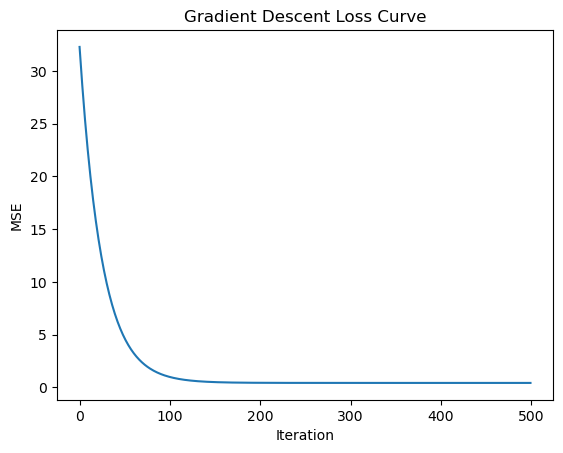

Train MSE: 0.4243458883680979
Test MSE: 0.38988749373333365
sklearn LinearRegression MSE: 0.39002514396395493


In [5]:
# %% [markdown]
# # Gradient Descent
# Gradient Descent is an iterative optimization algorithm used to minimize a loss function, typically the Mean Squared Error (MSE) in regression problems.
# Here, we demonstrate Gradient Descent for predicting wine quality scores (continuous) from physicochemical features.

# %%
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# %% 
### 1. Load Dataset ###
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Use features and quality as target
X = data.drop('quality', axis=1).values
y = data['quality'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% [markdown]
# # 🧠 Gradient Descent Implementation from Scratch

# %%
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    mse_history = []

    for i in range(n_iter):
        y_pred = np.dot(X, w) + b
        error = y_pred - y
        mse = np.mean(error**2)
        mse_history.append(mse)

        # Gradients
        dw = (2/n_samples) * np.dot(X.T, error)
        db = (2/n_samples) * np.sum(error)

        # Update weights
        w -= lr * dw
        b -= lr * db

    return w, b, mse_history

# Train
w, b, mse_history = gradient_descent(X_train_scaled, y_train, lr=0.01, n_iter=500)

# %%
# Plot loss curve
plt.plot(mse_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss Curve")
plt.show()

# %%
# Predictions
y_pred_train = np.dot(X_train_scaled, w) + b
y_pred_test = np.dot(X_test_scaled, w) + b

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

# %% [markdown]
# # 🧪 Optional: Using scikit-learn LinearRegression (analytical solution)
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_sklearn = lr_model.predict(X_test_scaled)

print("sklearn LinearRegression MSE:", mean_squared_error(y_test, y_pred_sklearn))

## Summary & Discussion

#We applied **Gradient Descent** to predict wine quality scores from physicochemical properties. Gradient Descent iteratively updates model weights to minimize the Mean Squared Error (MSE) between predicted and actual values.

#**Key Points:**  
#- The scratch implementation converged to a reasonable MSE, as shown in the loss curve.  
#- Scaling features improved convergence speed and stability.  
#- scikit-learn's LinearRegression finds the exact solution analytically, slightly outperforming Gradient Descent for this dataset.

#**Limitations:**  
#- Gradient Descent may converge slowly or get stuck if learning rate is poorly chosen.  
#- Sensitive to feature scaling and number of iterations.  

#**Potential Improvements:**  
#- Experiment with adaptive learning rates (e.g., Adam, RMSprop).  
#- Use regularization (Ridge, Lasso) to prevent overfitting.  
#- Explore more complex models (Random Forest, Gradient Boosting) for higher predictive accuracy.

#**Conclusion:**  
#Gradient Descent illustrates the foundation of optimization in machine learning. Understanding its mechanics is crucial for training linear and nonlinear models effectively.
